# DCSI 503 - Homework 6
### Jeff Boczkaja

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv('iris.txt', sep='\t')
ames = pd.read_csv('ames_housing.txt', sep='\t')
titanic = pd.read_csv('titanic.txt', sep='\t')
batting = pd.read_csv('batting.csv', sep=',')

## Problem 1: Iris Dataset

In [3]:
iris.head(8)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.5,4.2,1.4,0.2,setosa
1,5.6,3.0,4.5,1.5,versicolor
2,7.2,3.6,6.1,2.5,virginica
3,4.8,3.0,1.4,0.3,setosa
4,5.5,2.4,3.8,1.1,versicolor
5,5.8,2.7,3.9,1.2,versicolor
6,6.0,3.4,4.5,1.6,versicolor
7,7.7,3.0,6.1,2.3,virginica


In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
iris_means = iris.groupby("species").mean()
iris_means

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


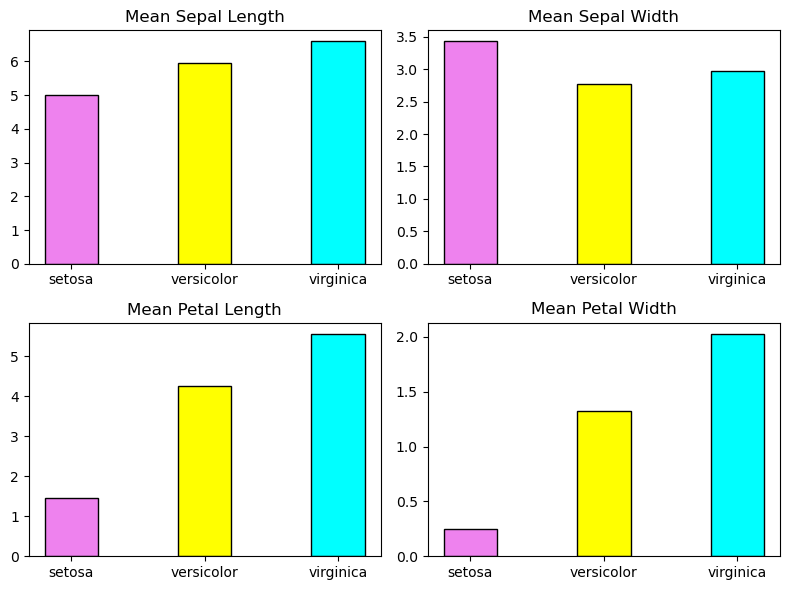

In [6]:
iris_colors=["violet","yellow","aqua"]
iris_columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

fig = plt.figure(figsize=(8, 6))
for i in range(1, 5):
    plt.subplot(2, 2, i)
    plt.title("Mean "+iris_columns[i-1])
    plt.bar(iris_means.index, iris_means.iloc[:,i-1], color =iris_colors,width = 0.4,edgecolor = "black")
    plt.tight_layout()
    plt.plot()

## Problem 2: Ames Housing - Neighborhoods

In [7]:
ames.head(8)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500


In [8]:
ames.columns.values

array(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage',
       'Lot Area', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
       'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
       'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', '1st Flr SF', '2nd Flr SF',
       'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',

In [9]:
ames_nbhd = ames[['Neighborhood', 'SalePrice']].groupby('Neighborhood').mean().sort_values('SalePrice')
ames_nbhd.head() 

,SalePrice
Neighborhood,
MeadowV,95756.486486
IDOTRR,103752.903226
BrDale,105608.333333
OldTown,123991.891213
BrkSide,124756.250000


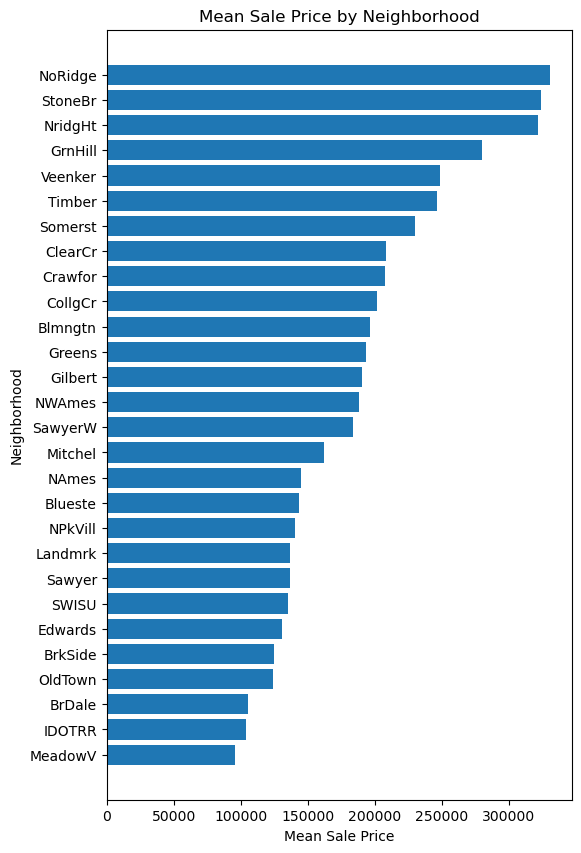

In [10]:
plt.figure(figsize=(6,10))
plt.title('Mean Sale Price by Neighborhood')
plt.xlabel('Mean Sale Price')
plt.ylabel('Neighborhood')
plt.barh(ames_nbhd.index, ames_nbhd['SalePrice'])
plt.show()

## Problem 3: Ames Housing - House Styles

In [11]:
ames_style = ames[['House Style', 'SalePrice']]
ames_style = ames_style.groupby('House Style').count()
ames_style.rename(columns={'SalePrice': 'Count'}, inplace=True)
ames_style.sort_values(by='Count', inplace=True)
ames_style

,Count
House Style,
2.5Fin,8
1.5Unf,19
2.5Unf,24
SFoyer,83
SLvl,128
1.5Fin,314
2Story,873
1Story,1481


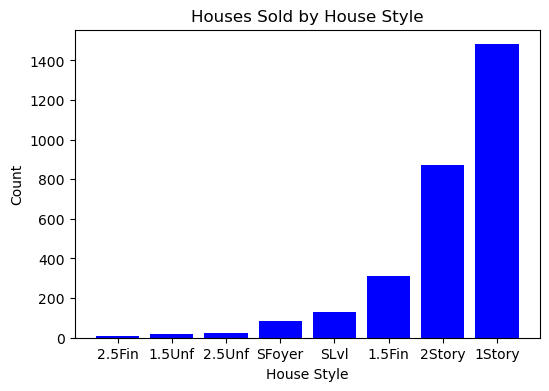

In [12]:
plt.figure(figsize=(6, 4))
plt.bar(ames_style.index, ames_style['Count'], color='blue')
plt.xlabel('House Style')
plt.ylabel('Count')
plt.title('Houses Sold by House Style')
plt.show()

## Problem 4: Titanic Dataset - Survival Rates

In [13]:
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750


In [14]:
survived_mean = titanic['Survived'].mean()
print("Proportion of Passengers who survived: {:.4f}".format(survived_mean))

Proportion of Passengers who survived: 0.3856


In [15]:
surv_rates = titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
surv_rates

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.137026

## Problem 5: Titanic Dataset – Sex Distribution by Class and Outcome

In [16]:
titanic['Female'] = np.where(titanic['Sex'] == 'female', 1, 0)
titanic['Male'] = np.where(titanic['Sex'] == 'male', 1, 0)
titanic.head(8)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Female,Male
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500,0,1
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833,1,0
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,1,0
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,1,0
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500,0,1
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583,0,1
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,0,1
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750,0,1


In [17]:
sex_dist_by_class = titanic.groupby('Pclass')[['Female', 'Male']].sum()
sex_dist_by_class

,Female,Male
Pclass,,
1,94,122
2,76,108
3,144,343


In [18]:
sex_dist_by_outcome = titanic.groupby('Survived')[['Female', 'Male']].sum()
sex_dist_by_outcome

,Female,Male
Survived,,
0,81,464
1,233,109


## Problem 6: Batting Data - Home Runs

In [19]:
batting.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [20]:
batting.columns.values

array(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'G', 'AB', 'R',
       'H', '2B', '3B', 'HR', 'RBI', 'SB', 'CS', 'BB', 'SO', 'IBB', 'HBP',
       'SH', 'SF', 'GIDP'], dtype=object)

In [21]:
total_hr = batting.groupby(['teamID', 'yearID'], as_index=False)['HR'].sum().sort_values(by='HR', ascending=False)
total_hr.head(10)

,teamID,yearID,HR
1840,NYA,2018,267
2384,SEA,1997,264
2722,TEX,2005,260
2771,TOR,2010,257
125,BAL,1996,257
145,BAL,2016,253
1273,HOU,2000,249
2718,TEX,2001,246
1834,NYA,2012,245
2383,SEA,1996,245


In [22]:
avg_hr = total_hr.groupby('teamID')['HR'].mean().sort_values(ascending=False).reset_index()
avg_hr.head(10)

,teamID,HR
0,COL,181.769231
1,MIL,180.761905
2,ML1,171.538462
3,ARI,170.142857
4,TOR,168.452381
5,ANA,165.500000
6,TEX,163.851064
7,TBA,162.714286
8,OAK,158.196078
9,BAL,157.923077


## Problem 7: Batting Data – Batting Averages

In [23]:
batting_avg = batting.groupby(['teamID', 'yearID'], as_index=False)[['H', 'AB']].sum()
batting_avg['BA'] = batting_avg['H'] / batting_avg['AB']
batting_avg = batting_avg.sort_values(by='BA', ascending=False)
batting_avg.head(10)

,teamID,yearID,H,AB,BA
2034,PHI,1894,1780,5088,0.349843
176,BLN,1894,1647,4799,0.343196
386,BS1,1873,933,2748,0.339520
626,CHN,1876,926,2748,0.336972
408,BSN,1894,1658,5011,0.330872
2035,PHI,1895,1664,5037,0.330355
178,BLN,1896,1548,4719,0.328036
179,BLN,1897,1584,4872,0.325123
177,BLN,1895,1530,4725,0.323810
388,BS1,1875,1128,3515,0.320910


## Problem 8: Batting Data – Cardinals vs. Cubs

In [24]:
stl_batting = batting.loc[(batting['teamID'] == 'SLN') & (batting['yearID'] >= 1900)]
stl_batting = stl_batting.groupby('yearID', as_index=False).agg({'H': 'sum', 'AB': 'sum', 'HR': 'sum'})
stl_batting['BA'] = stl_batting['H'] / stl_batting['AB']
chi_batting = batting.loc[(batting['teamID'] == 'CHN') & (batting['yearID'] >= 1900)]
chi_batting = chi_batting.groupby('yearID', as_index=False).agg({'H': 'sum', 'AB': 'sum', 'HR': 'sum'})
chi_batting['BA'] = chi_batting['H'] / chi_batting['AB']

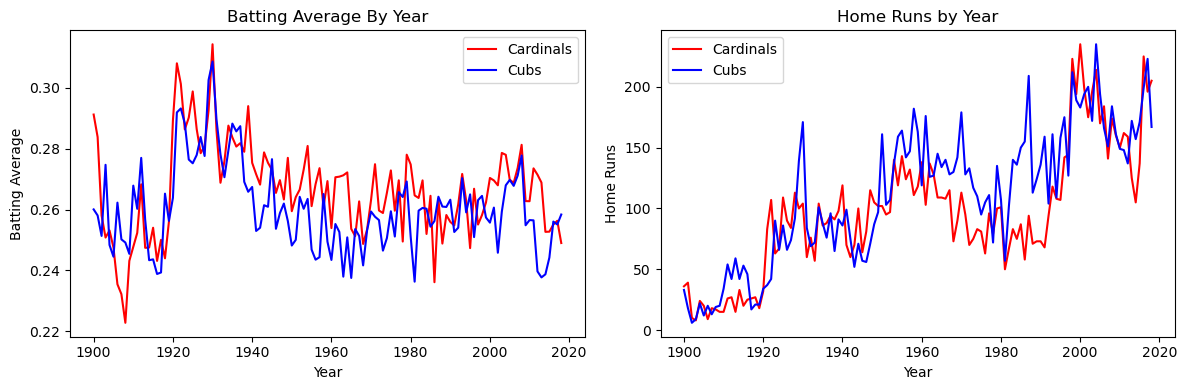

In [25]:
fig, axes = plt.subplots(1, 2, figsize=[12, 4])
axes[0].plot(stl_batting['yearID'], stl_batting['BA'], color='red', label='Cardinals')
axes[0].plot(chi_batting['yearID'], chi_batting['BA'], color='blue', label='Cubs')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Batting Average')
axes[0].set_title('Batting Average By Year')
axes[0].legend()
axes[1].plot(stl_batting['yearID'], stl_batting['HR'], color='red', label='Cardinals')
axes[1].plot(chi_batting['yearID'], chi_batting['HR'], color='blue', label='Cubs')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Home Runs')
axes[1].set_title('Home Runs by Year')
axes[1].legend()
plt.tight_layout()
plt.show()

In [29]:
proportion_higher_avg = np.mean(stl_batting['BA'] > chi_batting['BA'])
proportion_higher_avg = round(proportion_higher_avg, 4)
print("Proportion of years where Cardinals had higher batting average: ", proportion_higher_avg)

Proportion of years where Cardinals had higher batting average:  0.7143


In [28]:
proportion_more_hr = np.mean(stl_batting['HR'] > chi_batting['HR'])
proportion_more_hr = round(proportion_more_hr, 4)
print("Proportion of years where Cardinals had more home runs: ", proportion_more_hr)

Proportion of years where Cardinals had more home runs:  0.3782
